## node2vec

### Setup

First of all, we install and import necessary libraries such as the node2vec.

If you are curious to learn how to implement fast random walks on graphs, I recommend you to [read the blog post](https://urldefense.com/v3/__https://www.singlelunch.com/2019/08/01/700x-faster-node2vec-models-fastest-random-walks-on-a-graph/__;!!Mih3wA!CZtHllhAAUqTeoZuMILlx9mshiPTbzWenVA_MaAXMoaBY7-uQp5YdSlySdaumYfsW7oVVnSMhAun6GQnqi2e$ ) which explains some of the design choices behind this library.

In [1]:
from node2vec import Node2Vec
import networkx as nx

Lastly, let's import some of the common libraries needed for our task.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Example

In [3]:
# Load the Zachary's Karate Club as a NetworkX Graph object
KCG = nx.karate_club_graph()
nx.info(KCG)

C:\Users\Srujan\AppData\Local\Temp\ipykernel_25448\282083699.py:3: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  nx.info(KCG)


'Graph named "Zachary\'s Karate Club" with 34 nodes and 78 edges'

In [4]:
# Fit embedding model to the Karate Club graph
node2vec = Node2Vec(KCG, dimensions=128, walk_length=40, num_walks=100, workers=2)
n2v = node2vec.fit(window=10, min_count=1)

Computing transition probabilities:   0%|          | 0/34 [00:00<?, ?it/s]

### Your Task

Create a small wrapper class which will expose only the few hyperparameters you will need to tune the Node2Vec

In [5]:
class Node2VecWrapper:
    def __init__(self, graph, dimensions=128, walk_length=40, num_walks=100, p=1, q=1, workers=2):
        self.graph = graph
        self.dimensions = dimensions
        self.walk_length = walk_length
        self.num_walks = num_walks
        self.p = p
        self.q = q
        self.workers = workers
        self.node2vec = None
        self.model = None

    def fit(self, window=10, min_count=1):
        self.node2vec = Node2Vec(self.graph, dimensions=self.dimensions, walk_length=self.walk_length,
                                 num_walks=self.num_walks, p=self.p, q=self.q, workers=self.workers)
        self.model = self.node2vec.fit(window=window, min_count=min_count)
        return self.model
    
KCG = nx.karate_club_graph()
node2vec_wrapper = Node2VecWrapper(KCG)
n2v_model = node2vec_wrapper.fit()

Computing transition probabilities:   0%|          | 0/34 [00:00<?, ?it/s]

Construct a pandas dataframe with the 2D embeddings from node2vec, plus the club name that each node belongs to after the split.

In [6]:
embeddings = np.array([n2v_model.wv[str(node)] for node in range(len(KCG))])
club_labels = [KCG.nodes[node]['club'] for node in range(len(KCG))]
df = pd.DataFrame(embeddings, columns=[f'x{i}' for i in range(1, embeddings.shape[1] + 1)])
df['club'] = club_labels
#df = pd.DataFrame(embeddings, columns=['x', 'y', 'club'])

Nodes who stayed with the Mr. Hi will be plotted in red, while nodes who moved with the Officer will be plotted in blue

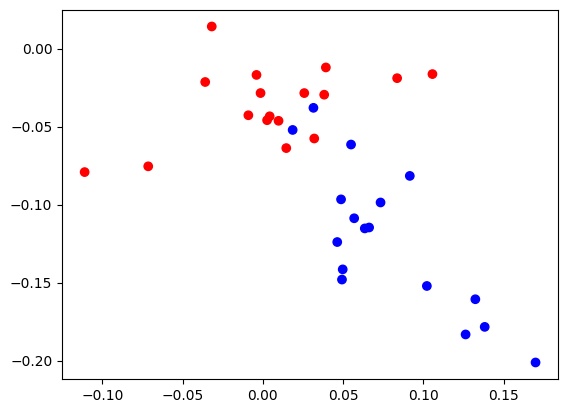

In [7]:
colors = ['red' if club == 'Mr. Hi' else 'blue' for club in df['club']]
plt.scatter(df['x1'], df['x2'], c=colors)
plt.show()

If your example trained correctly, you should notice a clear separation between the blue and red nodes.  Solely from the graph structure, node2vec could predict how the Zachary's Karate Club split!

Tune the hyperparameters ```p``` and ```q```, and notice how they affect the resulting embeddings.

Now you will study the behavior of node2vec on [barbell graphs](https://urldefense.com/v3/__https://en.wikipedia.org/wiki/Barbell_graph).*5Cn__;JQ!!Mih3wA!CZtHllhAAUqTeoZuMILlx9mshiPTbzWenVA_MaAXMoaBY7-uQp5YdSlySdaumYfsW7oVVnSMhAun6CfYbpLn$ 
Below you can see a toy example of a barbell graph generated with NetworkX.

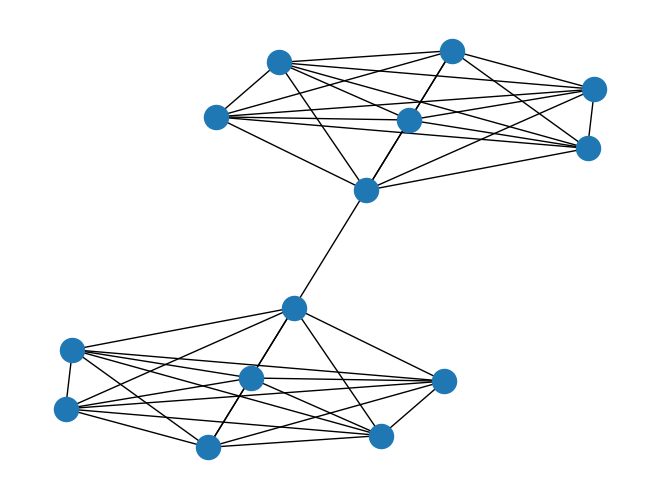

In [8]:
toy_barbell = nx.barbell_graph(7, 0)
nx.draw_kamada_kawai(toy_barbell)




Generate a larger barbell graph, where each complete graph has exactly 1000 nodes, and the path length between the complete graphs is equal to 1 (i.e., all the nodes in the barbell graph belong to either one of the two complete graphs, and the connecting path does not have any internal node).

Then, learn node2vec embeddings on this graph, setting ```p = 1, q = 1``` and ```d = 10```.

In [9]:
larger_barbell = nx.barbell_graph(100, 1)
node2vec_wrapper_barbell = Node2VecWrapper(larger_barbell, dimensions=10)
n2v_model_barbell = node2vec_wrapper_barbell.fit()

Computing transition probabilities:   0%|          | 0/201 [00:00<?, ?it/s]

Write a function that takes as input a node id ```n``` in the graph (e.g., ```5```) and returns a list containing the cosine similarity between the node2vec vector of the input node ```n``` and all the nodes in the given barbell graph (including the similarity with ```n``` itself).

In [10]:
from sklearn.metrics.pairwise import cosine_similarity
def compute_cosine_similarity(node_id, graph, model):
    node_vector = model.wv[str(node_id)]
    all_vectors = np.array([model.wv[str(node)] for node in range(len(graph))])
    similarities = cosine_similarity([node_vector], all_vectors)[0]
    return similarities.tolist()
similarities = compute_cosine_similarity(5, toy_barbell, n2v_model_barbell)
print(similarities)

[0.9887477159500122, 0.9919764995574951, 0.9825714826583862, 0.9815887212753296, 0.9897305369377136, 0.9999999403953552, 0.982802152633667, 0.96291583776474, 0.9768056273460388, 0.9913537502288818, 0.984707236289978, 0.986427903175354, 0.9804936051368713, 0.9902424812316895]


Generate another barbell graph, this time adding a path of length 51 between the two complete graphs. To find out how, refer to the NetworkX documentation: [https://urldefense.com/v3/__https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.classic.barbell_graph.html*networkx.generators.classic.barbell_graph*(https:/*networkx.github.io/documentation/stable/reference/generated/networkx.generators.classic.barbell_graph.html*networkx.generators.classic.barbell_graph)*5Cn__;I10vIyU!!Mih3wA!CZtHllhAAUqTeoZuMILlx9mshiPTbzWenVA_MaAXMoaBY7-uQp5YdSlySdaumYfsW7oVVnSMhAun6M78TXi1$ 
Learn the node2vec embeddings for the nodes of this new graph, using the same hyperparameters as before.

In [11]:
larger_barbell = nx.barbell_graph(100, 51)
node2vec_wrapper_larger_barbell = Node2VecWrapper(larger_barbell, dimensions=10)
n2v_model_larger_barbell = node2vec_wrapper_larger_barbell.fit()

Computing transition probabilities:   0%|          | 0/251 [00:00<?, ?it/s]